<a href="https://colab.research.google.com/github/thenukii/ML-CW/blob/main/DataPreProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [124]:
!pip install ucimlrepo

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# metadata
print(adult.metadata)

# variable information
print(adult.variables)


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

In [127]:
X["income"] = y

# Creating Dataframe

In [128]:
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [129]:
X.shape

(48842, 15)

In [130]:
X.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [131]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [132]:
X['income'].value_counts()

<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: income, dtype: int64

In [133]:
X['sex'].value_counts()

Male      32650
Female    16192
Name: sex, dtype: int64

In [134]:
X['native-country'].value_counts()

United-States                 43832
Mexico                          951
?                               583
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

In [135]:
X['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [136]:
X['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
?                    1843
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [137]:
# Here we will check the missing values in our dataset
X.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

# Replacing ? with Mode

In [138]:
X.replace('?', np.NaN,inplace = True)
X.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [139]:
row_with_question_mark = X.iloc[27]
print("Row containing '?' after replace Nan:")
print(row_with_question_mark)

Row containing '?' after replace Nan:
age                               54
workclass                        NaN
fnlwgt                        180211
education               Some-college
education-num                     10
marital-status    Married-civ-spouse
occupation                       NaN
relationship                 Husband
race              Asian-Pac-Islander
sex                             Male
capital-gain                       0
capital-loss                       0
hours-per-week                    60
native-country                 South
income                          >50K
Name: 27, dtype: object


In [140]:
mode_values = X.mode().iloc[0]
X.fillna(mode_values, inplace=True)

In [141]:
row_with_Nan = X.iloc[27]
print("Row containing 'Nan' after replace mode:")
print(row_with_Nan)

Row containing 'Nan' after replace mode:
age                               54
workclass                    Private
fnlwgt                        180211
education               Some-college
education-num                     10
marital-status    Married-civ-spouse
occupation            Prof-specialty
relationship                 Husband
race              Asian-Pac-Islander
sex                             Male
capital-gain                       0
capital-loss                       0
hours-per-week                    60
native-country                 South
income                          >50K
Name: 27, dtype: object


# Replace the <=50K. with <=50K and >50K. with >50K

In [142]:
X["income"] = X['income'].str.replace('<=50K.', '<=50K' )
X["income"] = X['income'].str.replace('>50K.', '>50K' )

<ipython-input-142-b6265caa2af9>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  X["income"] = X['income'].str.replace('<=50K.', '<=50K' )
<ipython-input-142-b6265caa2af9>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  X["income"] = X['income'].str.replace('>50K.', '>50K' )


In [143]:
X['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

# How values ​​change with income

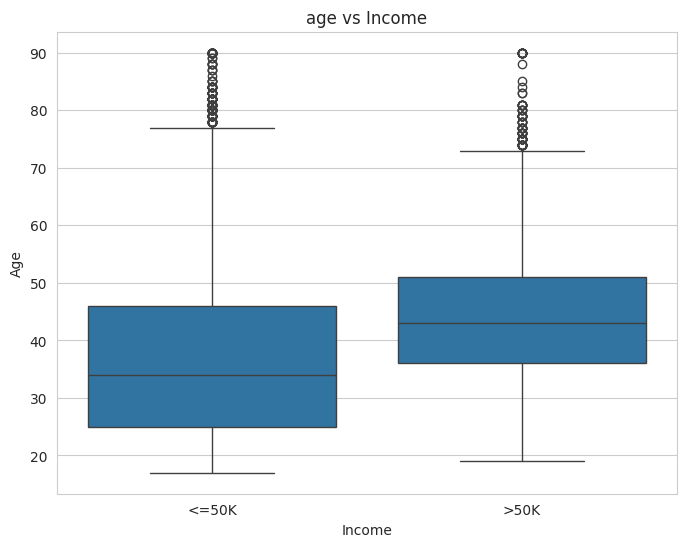

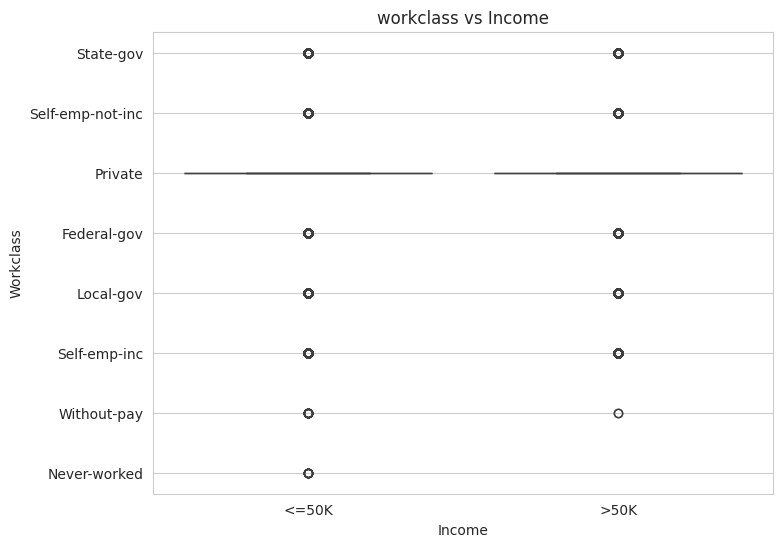

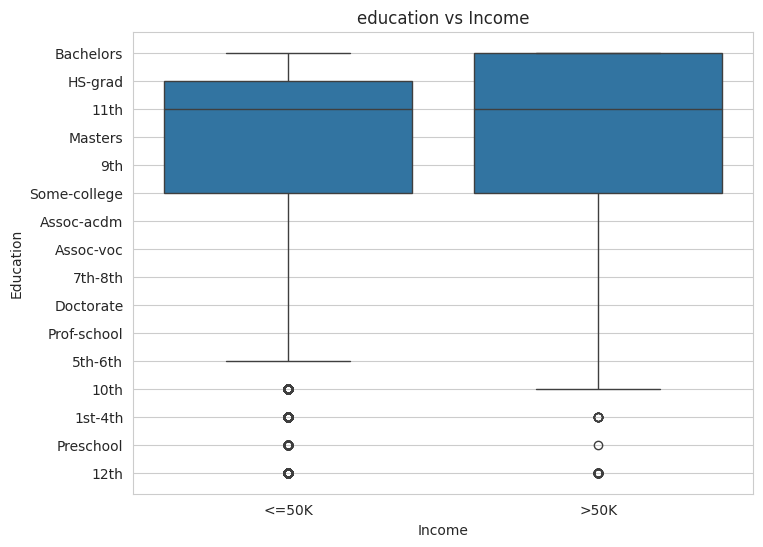

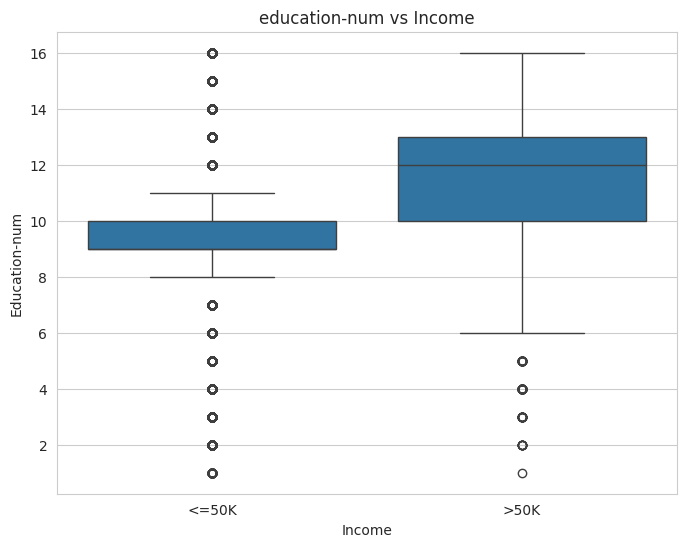

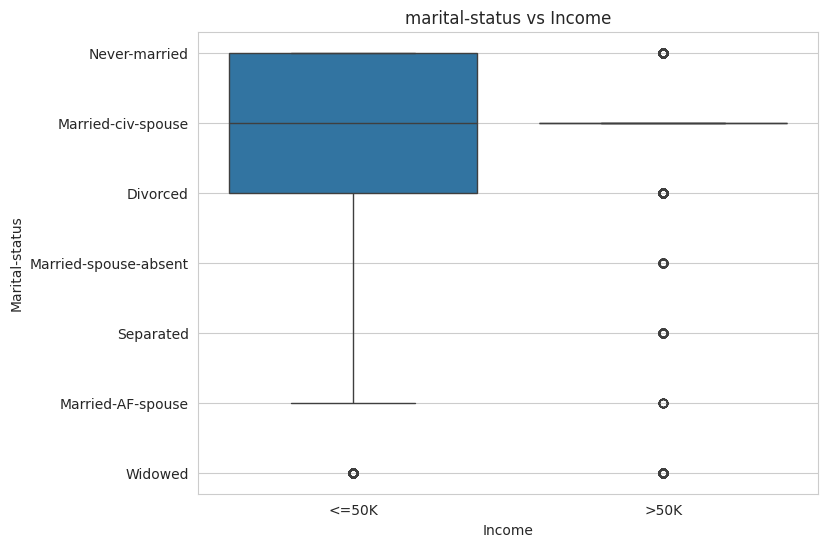

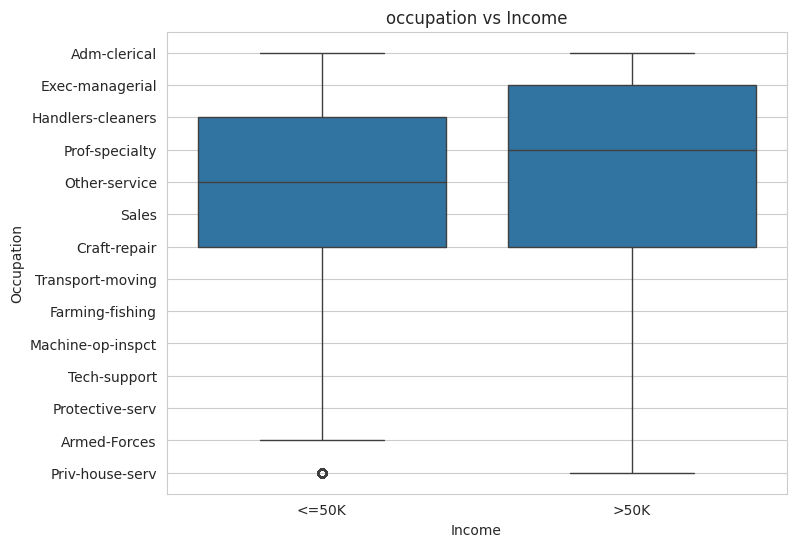

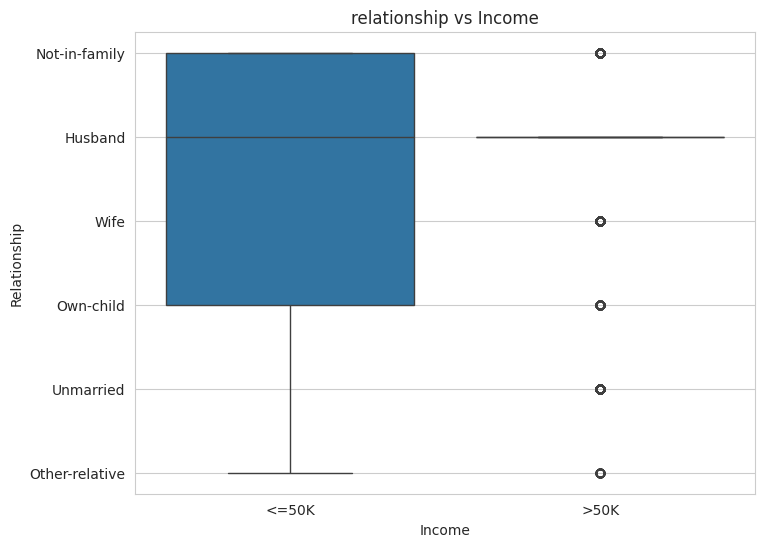

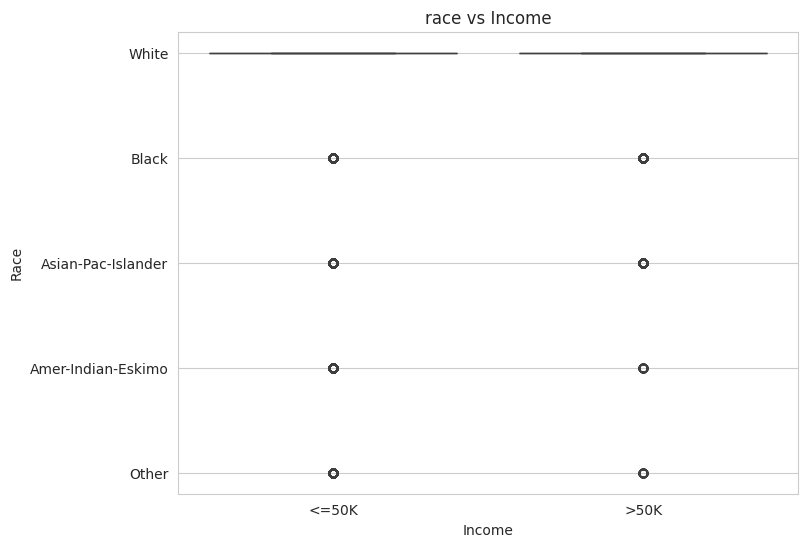

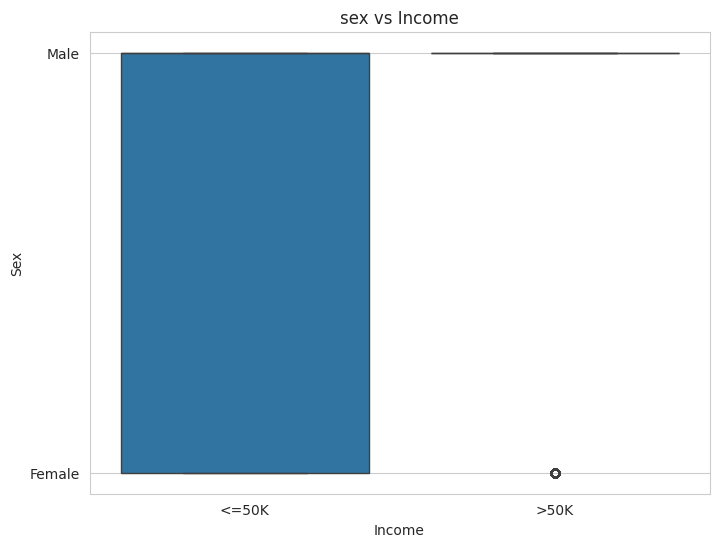

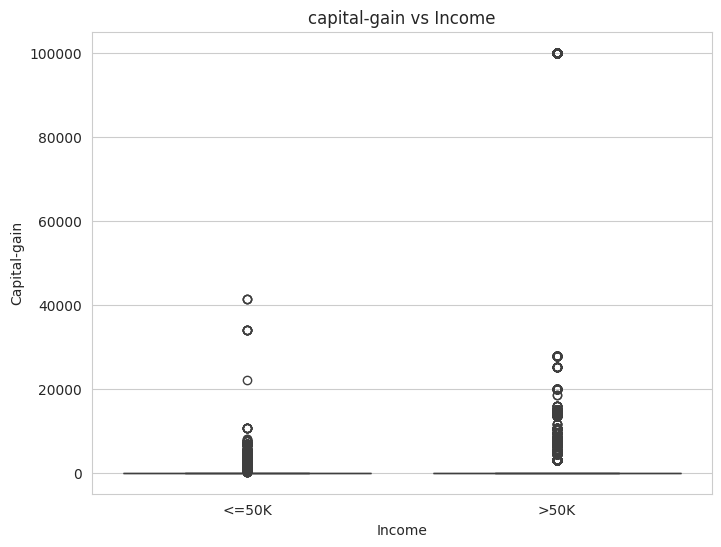

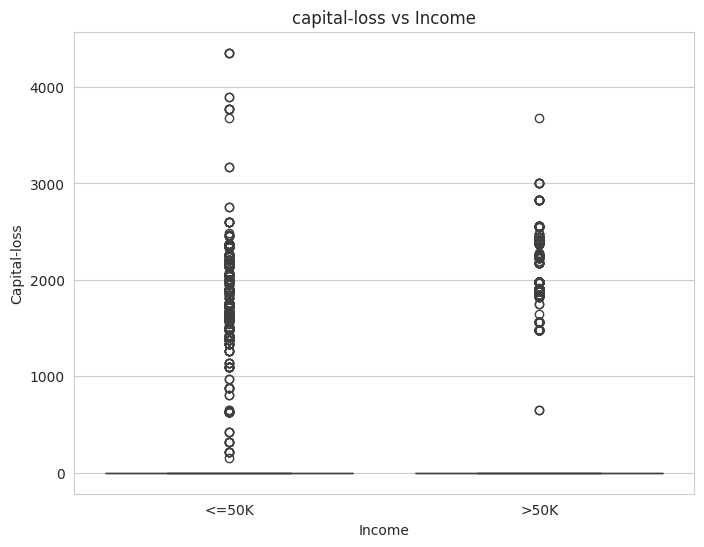

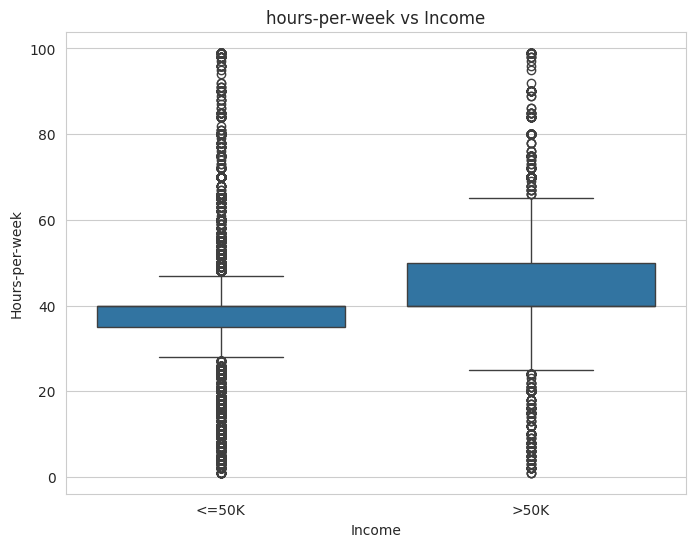

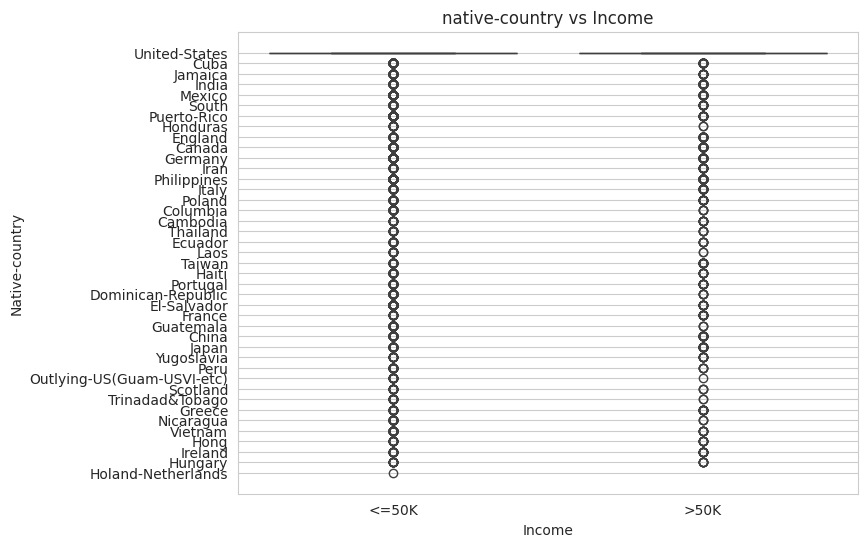

In [144]:
features = ["age","workclass","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week" ,"native-country"]

# Create boxplots for each feature
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='income', y=feature, data=X)
    plt.title(f'{feature} vs Income')
    plt.xlabel('Income')
    plt.ylabel(feature.capitalize())
    plt.show()

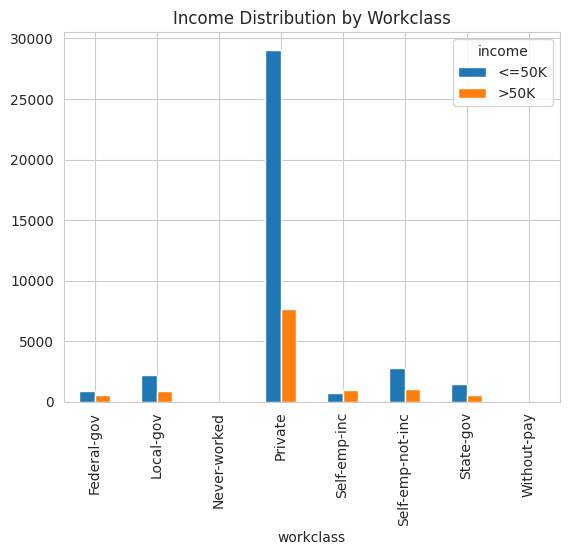

In [145]:
pd.crosstab(X['age'], X['income']).plot(kind='bar')
plt.title('Income Distribution by Workclass')
plt.show()

In [ ]:
pd.crosstab(X['workclass'], X['income']).plot(kind='bar')
plt.title('Income Distribution by Workclass')
plt.show()

In [ ]:
pd.crosstab(X['workclass'], X['income']).plot(kind='bar')
plt.title('Income Distribution by Workclass')
plt.show()

# Find Outliers

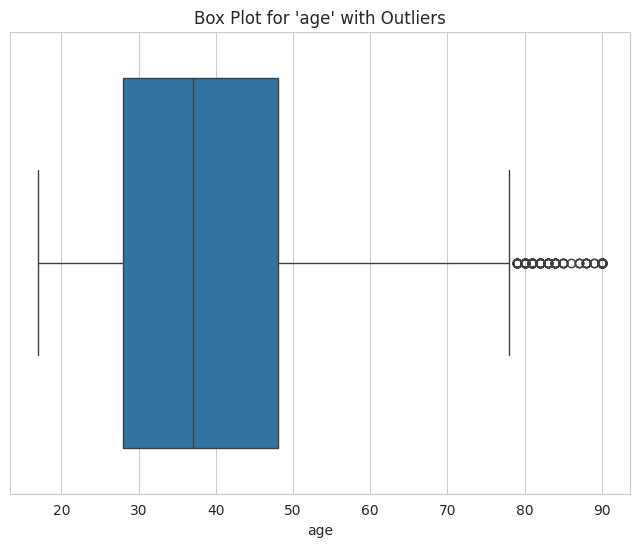

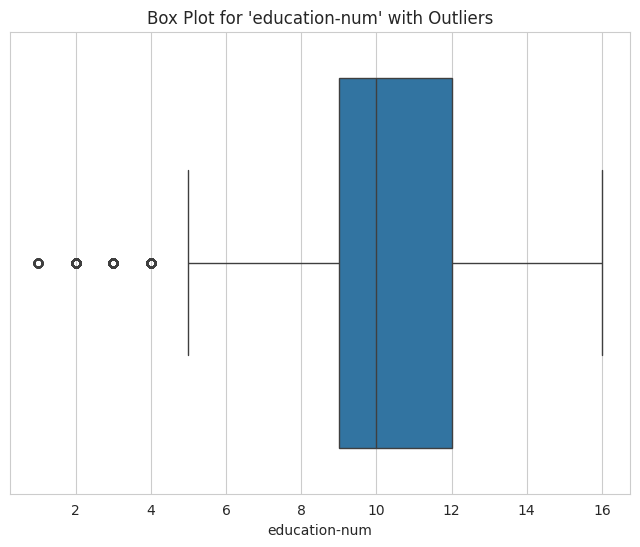

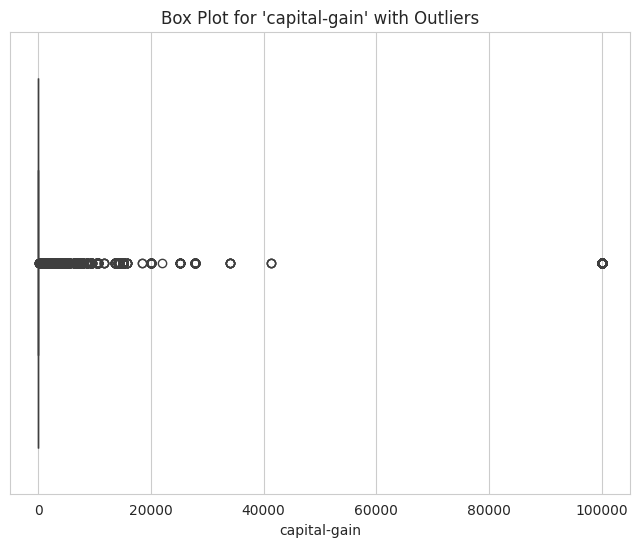

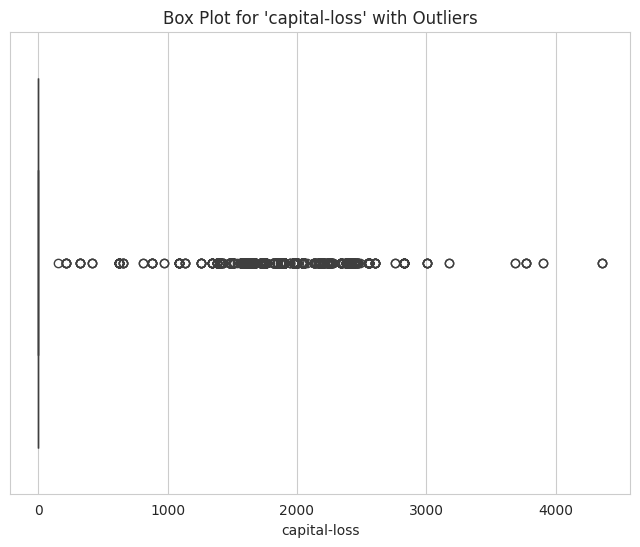

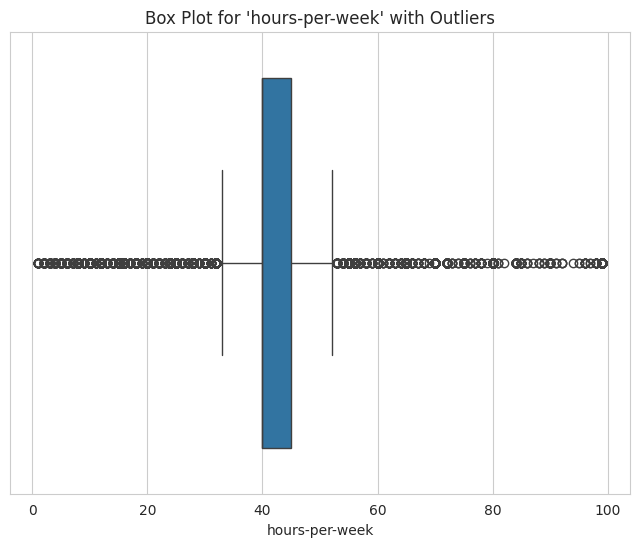

In [146]:
# Specify the columns to check for outliers
columns_to_check = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# Detect outliers using IQR method
outliers_iqr = detect_outliers_iqr(X, columns_to_check)

for col, indices in outliers_iqr.items():
    if len(indices) > 0:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=X[col])
        plt.title("Box Plot for '{}' with Outliers".format(col))
        plt.show()

In [147]:
def detect_outliers_iqr(df, columns):
    outliers = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_indices = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
        outliers[col] = outlier_indices
    return outliers

# Specify the columns to check for outliers
columns_to_check = ['age']

# Detect outliers using IQR method
outliers_iqr = detect_outliers_iqr(X, columns_to_check)

# Print the outliers for each column
for col, indices in outliers_iqr.items():
    print("Outliers in column '{}':".format(col))
    print(indices)
    print()


Outliers in column 'age':
Int64Index([   74,   222,   430,   918,  1040,  1168,  1935,  2303,  2754,
             2891,
            ...
            47301, 47649, 47659, 47969, 48495, 48524, 48564, 48667, 48709,
            48812],
           dtype='int64', length=216)



In [148]:
# Remove outliers from DataFrame
def remove_outliers(df, outliers):
    df_cleaned = df.copy()
    for col, indices in outliers.items():
        df_cleaned = df_cleaned.drop(indices)
    return df_cleaned

# Remove outliers from the DataFrame
X_cleaned = X.drop(index=[index for indices in outliers_iqr.values() for index in indices])

# Display the shape of the cleaned DataFrame
print("Shape of cleaned DataFrame:", X_cleaned.shape)


Shape of cleaned DataFrame: (48626, 15)


# Label Encoding

In [149]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X['workclass'] = le.fit_transform(X['workclass'])
X['education'] = le.fit_transform(X['education'])
X['marital-status'] = le.fit_transform(X['marital-status'])
X['occupation'] = le.fit_transform(X['occupation'])
X['relationship'] = le.fit_transform(X['relationship'])
X['race'] = le.fit_transform(X['race'])
X['sex'] = le.fit_transform(X['sex'])
X['native-country'] = le.fit_transform(X['native-country'])
X['income'] = le.fit_transform(X['income'])

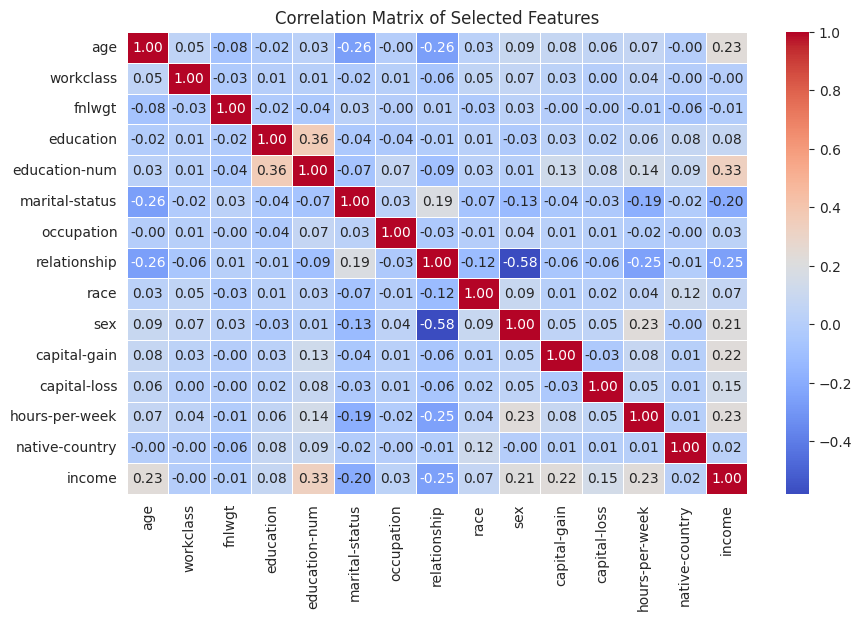

In [150]:
correlation_matrix = X.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Selected Features')
plt.show()